In [199]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import random

# 재현성을 위해 random seed 설정
random.seed(42)
np.random.seed(42)

# 데이터 준비
X = np.array([[1],[2],[3],[4],[5]])   # 독립 변수
y = np.array([2,4,5,4,5])           # 종속 변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)     # 학습시키는 함수

# 예측 및 평가
predictions = model.predict(X_test)

# 결과 출력
print("학습 데이터 크기 : ", X_train.shape[0])
print("테스트 데이터 크기 : ", X_test.shape[0])
print("\n모델 계수 : ")
print("기울기 (slope) : ", model.coef_[0])
print("절편 (intercept) : ", model.intercept_)
print("\n테스트 세트 실제 값 : ", y_test)
print("테스트 세트 예측 값 : ", predictions)
print("\n모델 성능 : ")
print("R² 점수 : ", r2_score(y_test, predictions))      # 결정 지수. 1에 가까울수록 성능이 좋음
print("평균 제곱 오차 (MSE) : ", mean_squared_error(y_test, predictions))

학습 데이터 크기 :  4
테스트 데이터 크기 :  1

모델 계수 : 
기울기 (slope) :  0.6857142857142857
절편 (intercept) :  1.7714285714285714

테스트 세트 실제 값 :  [4]
테스트 세트 예측 값 :  [3.14285714]

모델 성능 : 
R² 점수 :  nan
평균 제곱 오차 (MSE) :  0.7346938775510206


c:\aiproject2\.venv\lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


데이터셋 크기: (768, 9)

처음 5개 행:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0 33.60   
1            1       85             66             29        0 26.60   
2            8      183             64              0        0 23.30   
3            1       89             66             23       94 28.10   
4            0      137             40             35      168 43.10   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.63   50        1  
1                      0.35   31        0  
2                      0.67   32        1  
3                      0.17   21        0  
4                      2.29   33        1  

기술통계:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
count       768.00   768.00         768.00         768.00   768.00 768.00   
mean          3.85   120.89          69.11          20.54    79.80  31.99   
std           3.37    31.97          

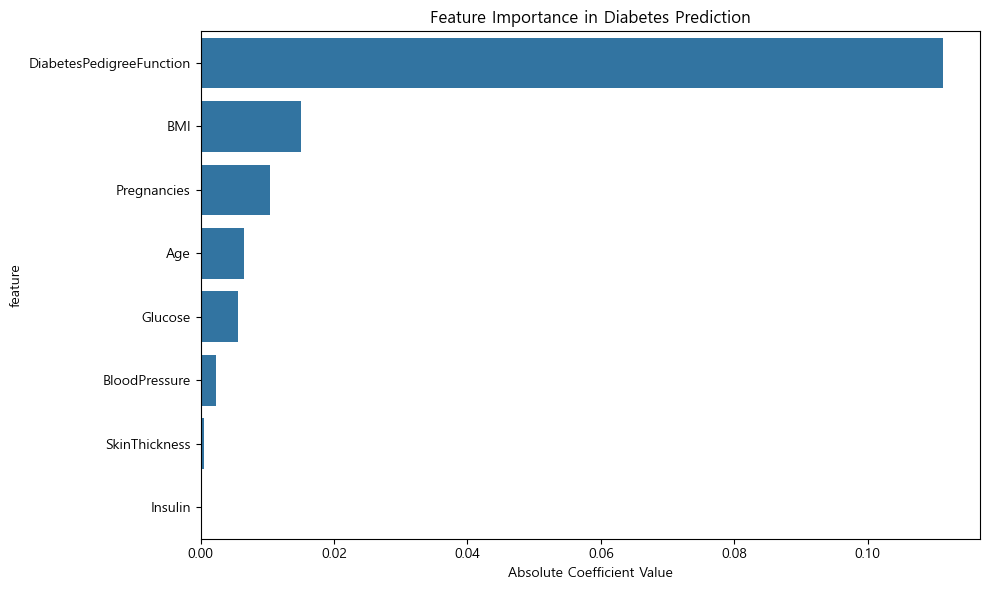

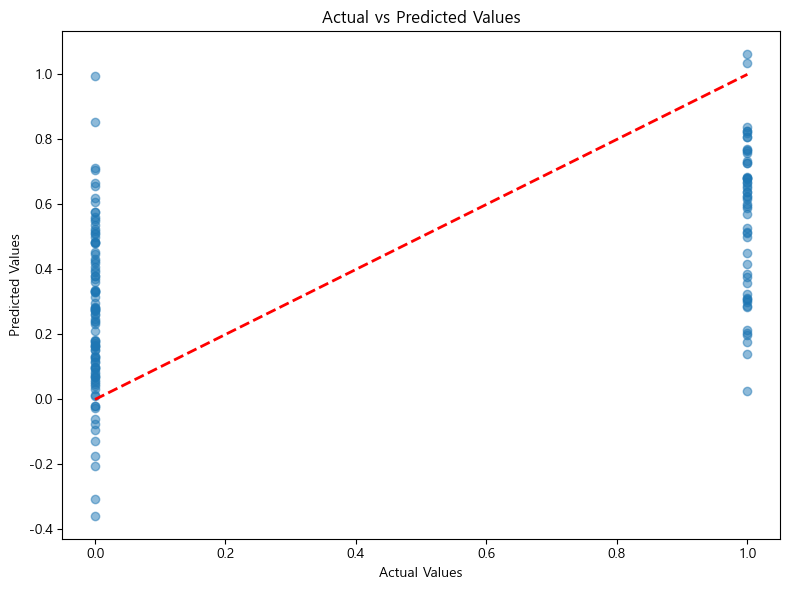

In [200]:
# 어떤 건강 지표가 당뇨병 예측에 더 중요한 영향을 미치는지 파악하는 선형회귀 예
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('dataset/diabetes.csv')

# 데이터 확인
print("데이터셋 크기:", df.shape)
print("\n처음 5개 행:")
print(df.head())
print("\n기술통계:")
print(df.describe())

# 독립변수(X)와 종속변수(y) 분리
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
print("\n모델 성능 : ")
print("R² 점수 : ", r2_score(y_test, y_pred))
print("평균 제곱 오차 (MSE) : ", mean_squared_error(y_test, y_pred))
print("평균 절대 오차 (MAE) : ", mean_absolute_error(y_test, y_pred))

# 특성 중요도 분석
feature_importance = pd.DataFrame({
    'feature' : X.columns,
    'importance' : np.abs(model.coef_)      # abs 절대값 coef 기울기
})
feature_importance = feature_importance.sort_values('importance', ascending = False)

print("\n특성 중요도 : ")
print(feature_importance)

# 시각화 : 특성 중요도
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Diabetes Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# 시각화: 실제값 vs 예측값
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

In [201]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 샘플 데이터 생성
# 공부 시간(X1)과 과외 시간(X2)에 따른 시험 점수(Y) 예측
study_hours = np.array([2,3,4,5,4,6,7,8,5,4])   # 하루 공부 시간
tutor_hours = np.array([0,1,0,2,1,3,2,3,2,1])   # 주간 과외 시간
test_scores = np.array([60,70,75,85,75,90,92,95,80,75]) # 시험 점수

# 입력 데이터 형태 맞추기
X = np.column_stack((study_hours, tutor_hours))
y = test_scores

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X,y)

# 결과 출력
print("회귀 계수 : ")
print(f"공부 시간 : {model.coef_[0]:.2f}")
print(f"과외 시간 : {model.coef_[1]:.2f}")
print(f"절편 : {model.intercept_:.2f}")

# 새로운 데이터로 예측
new_student = np.array([[6,2]])
prediction = model.predict(new_student)
print(f"\n예측 점수 : {prediction[0]:.1f}")

# 모델 성능 평가 (R-squared)
r_squared = model.score(X, y)
print(f"R-squared : {r_squared:.4f}")

회귀 계수 : 
공부 시간 : 4.87
과외 시간 : 1.94
절편 : 53.39

예측 점수 : 86.5
R-squared : 0.9613


회귀 계수 : 
X1 : 1.7882
X2 : 2.9284
X3 : 1.5135

절편 : 0.1535

R-squared 값 : 0.9566
평균 제곱근 오차(RMSE) : 0.7174


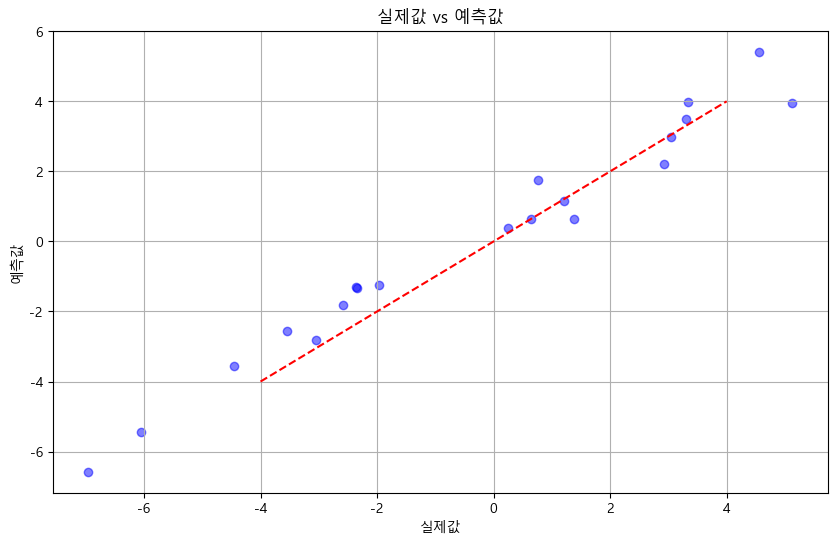


새로운 데이터 예측값 : 3.2192


c:\aiproject2\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [202]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'             # 폰트 지정과 마이너스 부호 깨짐 지정과
# plt.rc('font', family = 'Malgun Gothic')

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False              # 숫자가 지수표현식으로 나올 때 지정 하는 

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format       # 한 묶음으로 항상 써줘야함

# 샘플 데이터 생성
np.random.seed(42)
n_samples = 100

# 독립변수 생성
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)
X3 = np.random.normal(0, 1, n_samples)

# 종속변수 생성 (Y = 2X1 + 3X2 + 1.5X3 + 오차)
Y = 2 * X1 + 3 * X2 + 1.5 * X3 + np.random.normal(0, 1, n_samples)

# 데이터프레임 생성
data = pd.DataFrame({
    'X1' : X1,
    'X2' : X2,
    'X3' : X3,
    'Y' : Y
})

# 학습용과 테스트용 데이터 분리
X = data[['X1', 'X2', 'X3']]
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                                                                    # random_state 중요. 숫자를 고정해줌
# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 출력
print("회귀 계수 : ")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature} : {coef:.4f}")
print(f"\n절편 : {model.intercept_:.4f}")
print(f"\nR-squared 값 : {r2_score(y_test, y_pred):.4f}")
print(f"평균 제곱근 오차(RMSE) : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([-4, 4], [-4, 4], 'r--')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs 예측값')
plt.grid(True)
plt.show()

# 새로운 데이터로 예측 예시
new_data = np.array([[0.5, 1.0, -0.5]])
prediction = model.predict(new_data)
print(f"\n새로운 데이터 예측값 : {prediction[0]:.4f}")

In [203]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('./dataset/LinearRegressionData.csv')

dataset.head()

,hour,score
0,0.50,10
1,1.20,8
2,1.80,14
3,2.40,26
4,2.60,22


In [204]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [205]:
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [206]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [207]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

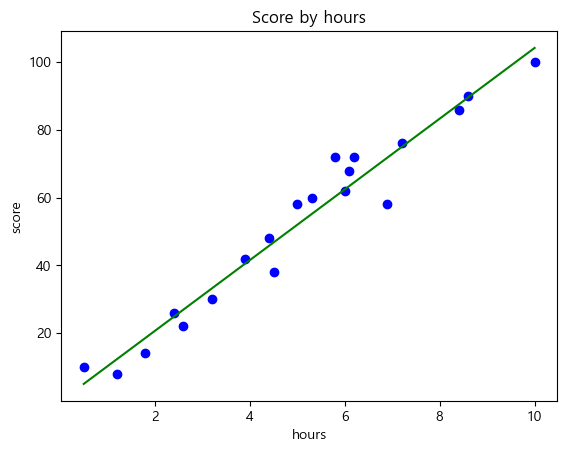

In [208]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [209]:
print('9시간 공부 시 예상 점수 : ', reg.predict([[9]]))

9시간 공부 시 예상 점수 :  [93.77478776]


In [210]:
reg.coef_

array([10.44369694])

In [211]:
reg.intercept_

-0.218484702867201

In [212]:
import matplotlib.pyplot as plt
import pandas as pd

In [213]:
dataset = pd.read_csv('./dataset/LinearRegressionData.csv')
dataset

,hour,score
0,0.50,10
1,1.20,8
2,1.80,14
3,2.40,26
4,2.60,22
5,3.20,30
6,3.90,42
7,4.40,48
8,4.50,38
9,5.00,58


In [214]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [216]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [217]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [218]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [219]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [220]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [221]:
y_test, len(y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

In [222]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [223]:
reg.fit(X_train, y_train)

LinearRegression()

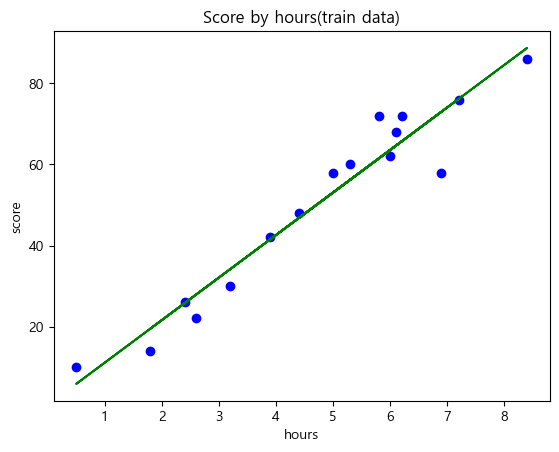

In [224]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title("Score by hours(train data)")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [225]:
reg.coef_

array([10.49161294])

In [226]:
reg.intercept_

0.6115562905169369

In [227]:
reg.score(X_test, y_test)

0.9727616474310156

In [228]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [229]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1) # max_iter : 모델 학습 횟수, eta0 : 학습율(1e-4: 0.0001), versbose=1 학습결과출력
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

c:\aiproject2\.venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=200, random_state=0, verbose=1)

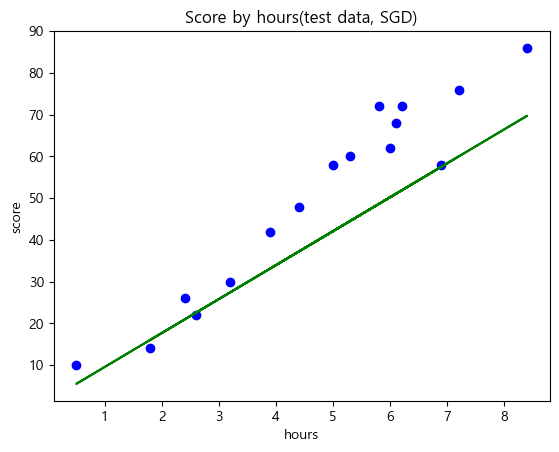

In [230]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.title('Score by hours(test data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [231]:
sr.coef_, sr.intercept_

(array([8.13259556]), array([1.433206]))

In [232]:
sr.score(X_test, y_test)

0.884872663907813

In [233]:
sr.score(X_train, y_train)

0.6837363504701681

In [234]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('./dataset/LogisticRegressionData.csv')
dataset.head()

,hour,pass
0,0.50,0
1,1.20,0
2,1.80,0
3,2.40,0
4,2.60,0


In [235]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [237]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [238]:
classifier.predict([[6]])

array([1], dtype=int64)

In [239]:
classifier.predict_proba([[6]]) # predict_proba : 각 클래스에 속할 확률(분류에 사용)

array([[0.141483, 0.858517]])

In [240]:
classifier.predict([[4]])

array([0], dtype=int64)

In [241]:
classifier.predict_proba([[4]])

array([[0.62497682, 0.37502318]])

In [242]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1], dtype=int64)

In [243]:
y_test

array([1, 0, 1, 0], dtype=int64)

In [244]:
X_test

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [245]:
# 정확도 반환
classifier.score(X_test, y_test)

0.75

In [246]:
X_range = np.arange(min(X), max(X), 0.1)
X_range

C:\Users\human-20\AppData\Local\Temp\ipykernel_6160\3009068081.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1)


array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [247]:
p = 1/(1+ np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))
p

array([[0.01035583, 0.01161118, 0.0130167 , 0.01458984, 0.01634996,
        0.01831847, 0.02051904, 0.02297778, 0.0257234 , 0.02878743,
        0.03220437, 0.03601184, 0.04025075, 0.04496534, 0.05020326,
        0.05601555, 0.06245651, 0.06958349, 0.07745655, 0.08613794,
        0.09569142, 0.10618136, 0.1176716 , 0.13022408, 0.14389721,
        0.15874395, 0.17480973, 0.19213011, 0.21072838, 0.23061305,
        0.25177552, 0.27418791, 0.29780133, 0.32254464, 0.348324  ,
        0.37502318, 0.40250484, 0.43061281, 0.45917517, 0.4880083 ,
        0.51692146, 0.54572176, 0.57421932, 0.60223222, 0.62959096,
        0.65614237, 0.6817526 , 0.70630918, 0.72972211, 0.75192414,
        0.77287004, 0.79253536, 0.81091459, 0.82801892, 0.84387392,
        0.858517  , 0.87199503, 0.88436205, 0.89567719, 0.90600282,
        0.91540298, 0.923942  , 0.93168343, 0.9386892 , 0.94501893,
        0.95072949, 0.95587461, 0.96050477, 0.96466704, 0.96840509,
        0.97175925, 0.97476661, 0.97746114, 0.97

In [248]:
X_range.shape

(95,)

In [249]:
p = p.reshape(-1)
p.shape

(95,)

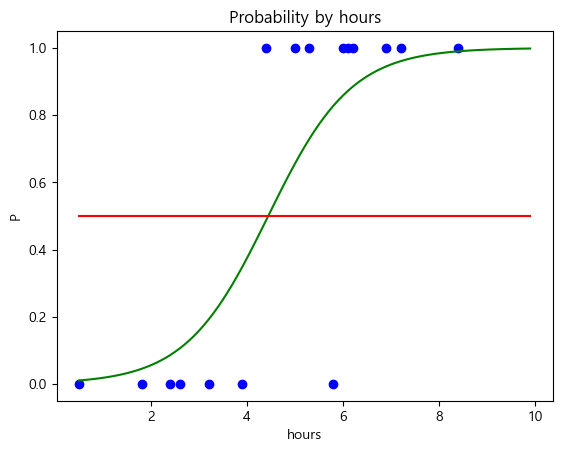

In [250]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # y축에 일정한 값인 0.5를 유지하는 직선
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

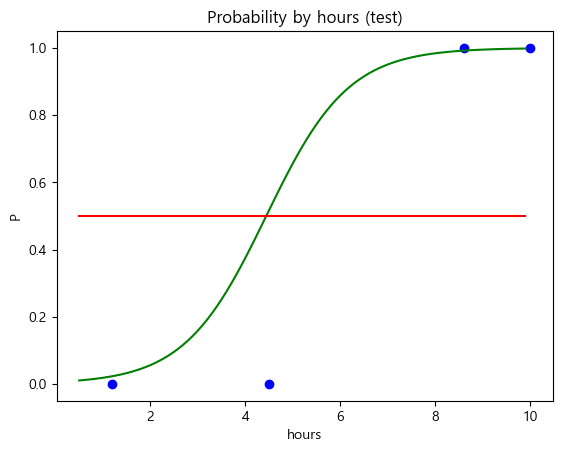

In [251]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')  # y축에 일정한 값인 0.5를 유지하는 직선
plt.title('Probability by hours (test)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

In [252]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [253]:
# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

In [254]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [255]:
# 의사결정 나무 모델 생성 및 학습
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [256]:
y_pred = clf.predict(X_test)

In [257]:
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 1.0


In [258]:
# 스팸메일 분류 예제
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [259]:
# 1. 데이터 불러오기
data = pd.read_csv('./dataset/spam.csv', encoding='ISO-8859-1')
data = data[['v1', 'v2']]  # 필요한 열만 선택
data.columns = ['label', 'text']  # 열 이름 변경

In [260]:
data = pd.read_csv('./dataset/spam.csv', encoding='ISO-8859-1')
data = data[['v1', 'v2']]  # 필요한 열만 선택
data.columns = ['label', 'text']  # 열 이름 변경

In [261]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # 레이블을 숫자로 변환
data.dropna(inplace=True)  # 결측치 제거

In [262]:
# 3. 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [263]:
# 4. TF-IDF 벡터화
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [264]:
# 5. 모델 학습
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [265]:
# 6. 예측 및 평가
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [266]:
# 7. 샘플 테스트
sample_text = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now!",
               "Congratulations! You've been selected to receive a free iPhone 15. Click to claim now!",
               "Hey, are we meeting for lunch tomorrow?"]
sample_tfidf = vectorizer.transform(sample_text)
predictions = model.predict(sample_tfidf)
for text, label in zip(sample_text, predictions):
    print(f"Text: {text} => {'Spam' if label == 1 else 'Ham'}")

Text: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now! => Spam
Text: Congratulations! You've been selected to receive a free iPhone 15. Click to claim now! => Spam
Text: Hey, are we meeting for lunch tomorrow? => Ham


In [267]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [268]:
# 1. 데이터 불러오기
data = pd.read_csv('./dataset/spam.csv', encoding='ISO-8859-1')
data = data[['v1', 'v2']]  # 필요한 열만 선택
data.columns = ['label', 'text']  # 열 이름 변경

In [269]:
# 2. 데이터 전처리
data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # 레이블을 숫자로 변환
data.dropna(inplace=True)  # 결측치 제거

In [270]:
# 3. 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [271]:
# 4. TF-IDF 벡터화
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [272]:
# 5. SVM 모델 학습
model = SVC(kernel='linear', random_state=42)  # SVM 모델 생성 (linear kernel)
model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [273]:
# 6. 예측 및 평가
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.979372197309417

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [274]:
# 7. 샘플 테스트
sample_text = [
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now!",
    "Congratulations! You've been selected to receive a free iPhone 15. Click to claim now!",
    "Hey, are we meeting for lunch tomorrow?"
]
sample_tfidf = vectorizer.transform(sample_text)
predictions = model.predict(sample_tfidf)
for text, label in zip(sample_text, predictions):
    print(f"Text: {text} => {'Spam' if label == 1 else 'Ham'}")

Text: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now! => Spam
Text: Congratulations! You've been selected to receive a free iPhone 15. Click to claim now! => Spam
Text: Hey, are we meeting for lunch tomorrow? => Ham


In [275]:
# KNN(K 최근접 이웃) 분류 예제
# iris 데이터셋셋 : 꽃받침(Sepal)과 꽃잎(Petal)의 길이 너비로 품종을 분류
# 필요한 라이브러리 임포트
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [276]:
# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

In [277]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [278]:
# 데이터 표준화 (KNN은 거리 기반 알고리즘이므로 표준화 필요)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [279]:
# KNN 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=3)  # k=3
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [280]:
# 테스트 데이터 예측
y_pred = knn.predict(X_test)

In [281]:
# 모델 성능 평가
print("모델 성능 평가:")
print("정확도:", accuracy_score(y_test, y_pred))
print("\n분류 보고서:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

모델 성능 평가:
정확도: 1.0

분류 보고서:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [282]:
# 새로운 데이터에 대한 예측
new_samples = [
    [5.1, 3.5, 1.4, 0.2],  # Setosa
    [6.2, 3.4, 5.4, 2.3],  # Virginica
    [5.9, 3.0, 4.2, 1.5],  # Versicolor
]

new_samples = scaler.transform(new_samples)  # 표준화
predictions = knn.predict(new_samples)

In [283]:
print("\n새로운 데이터에 대한 예측 결과:")
for i, pred in enumerate(predictions):
    print(f"샘플 {i+1}: {iris.target_names[pred]}")


새로운 데이터에 대한 예측 결과:
샘플 1: setosa
샘플 2: virginica
샘플 3: versicolor


In [284]:
# 실제값과 예측값 정의
actual_values = [3, -0.5, 2, 7]  # 실제값 리스트
predicted_values = [2.5, 0, 2, 8]  # 예측값 리스트

# MSE 계산
squared_errors = [(a - p) ** 2 for a, p in zip(actual_values, predicted_values)]  # 각 오차를 제곱
mse = sum(squared_errors) / len(squared_errors)  # 제곱 오차의 평균

# 결과 출력
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.375


In [285]:
# 실제값과 예측값 정의
actual_values = [3, -0.5, 2, 7]  # 실제값 리스트
predicted_values = [2.5, 0, 2, 8]  # 예측값 리스트

# RMSE 계산
squared_errors = [(a - p) ** 2 for a, p in zip(actual_values, predicted_values)]  # 각 오차를 제곱
mse = sum(squared_errors) / len(squared_errors)  # MSE 계산
rmse = mse ** 0.5  # MSE의 제곱근을 계산하여 RMSE를 얻음

# 결과 출력
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.6123724356957945


In [ ]:
# 실제값과 예측값 정의
actual_values = [3, -0.5, 2, 7]  # 실제값 리스트
predicted_values = [2.5, 0, 2, 8]  # 예측값 리스트

# MAE 계산
absolute_errors = [abs(a - p) for a, p in zip(actual_values, predicted_values)]  # 각 오차의 절대값
mae = sum(absolute_errors) / len(absolute_errors)  # 절대 오차의 평균

# 결과 출력
print("Mean Absolute Error (MAE):", mae)